# Medical Signal Processing Project

## Based on Dataset "Non-EEG Dataset for Assessment of Neurological Status"

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
import re

## Raw Data Pre-prossesing

### For each subject read .csv file with raw data from both devices and sort them by SubjectID

In [6]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

path = pathlib.Path().resolve("/home/spock/PycharmProjects/Biosignals/") # use your path
path = str(path)
SpO2HR_files = glob.glob(path + "/*SpO2HR.csv")
AccTempEDA_files = glob.glob(path + "/*AccTempEDA.csv")

SpO2HR_files.sort(key=natural_keys)

AccTempEDA_files.sort(key=natural_keys)

### save data from Affectiva device to a unified .csv declaring 4 relax states for each subject

In [28]:
li_AccTempEDA = []

for i, filename in  enumerate(AccTempEDA_files):
    df_AccTempEDA = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_AccTempEDA.insert(0, 'SubjectID', SubjectID)
    df_AccTempEDA.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_AccTempEDA)):
#         df_AccTempEDA.loc[j,"Label"] = "Relax1" 

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 1:
            df_AccTempEDA.loc[j,"Label"] = "Relax1" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 2:
            df_AccTempEDA.loc[j,"Label"] = "Relax2" 
            continue

        if df_AccTempEDA.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_AccTempEDA.loc[j,"Label"] == "Relax" and relax == 3:  
            df_AccTempEDA.loc[j,"Label"] = "Relax3"
            continue

        if df_AccTempEDA.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_AccTempEDA.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_AccTempEDA.loc[j,"Label"] = "Relax4"    
        
    
    li_AccTempEDA.append(df_AccTempEDA)
    

AccTempEDA_frame = pd.concat(li_AccTempEDA, axis=0, ignore_index=True)

AccTempEDA_frame.to_csv("AccTempEDA_frame.csv", index=False)

### save data from Nonin device to a unified .csv declaring 4 relax states for each subject

In [29]:
li_SpO2HR = []

for i, filename in  enumerate(SpO2HR_files):
    df_SpO2HR = pd.read_csv(filename)
    SubjectID =  "Subject"+str(i+1)
    df_SpO2HR.insert(0, 'SubjectID', SubjectID)
    df_SpO2HR.insert(1, 'DateTime', '2017-03-22') #2017-03-22
    
    relax = 1

    for j in range(0, len(df_SpO2HR)):

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 1:
            df_SpO2HR.loc[j,"Label"] = "Relax1" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "PhysicalStress" and relax == 1:
            relax = 2

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 2:
            df_SpO2HR.loc[j,"Label"] = "Relax2" 
            continue

        if df_SpO2HR.loc[j,"Label"] == "CognitiveStress" and relax == 2:  
            relax = 3                                         

        if df_SpO2HR.loc[j,"Label"] == "Relax" and relax == 3:  
            df_SpO2HR.loc[j,"Label"] = "Relax3"
            continue

        if df_SpO2HR.loc[j,"Label"] == "EmotionalStress" and relax == 3:
            relax = 4                                     

        if df_SpO2HR.loc[j,"Label"]  == "Relax" and relax == 4:  
            df_SpO2HR.loc[j,"Label"] = "Relax4"    
        
    
    li_SpO2HR.append(df_SpO2HR)
    

SpO2HR_frame = pd.concat(li_SpO2HR, axis=0, ignore_index=True)

SpO2HR_frame.to_csv("SpO2HR_frame.csv", index=False)

In [12]:
df_1 = pd.read_csv("AccTempEDA_frame.csv")
df_1

,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label
0,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax1
1,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax1
2,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax1
3,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax1
4,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax1
...,...,...,...,...,...,...,...,...,...,...,...
368847,Subject20,2017-03-22,17,32,52.375,0.10,-0.97,0.53,32.4,0.434,Relax4
368848,Subject20,2017-03-22,17,32,52.500,0.10,-0.96,0.53,32.2,0.434,Relax4
368849,Subject20,2017-03-22,17,32,52.625,0.10,-0.97,0.52,32.4,0.434,Relax4
368850,Subject20,2017-03-22,17,32,52.750,0.11,-0.97,0.53,32.4,0.434,Relax4


In [30]:
df_2 = pd.read_csv("SpO2HR_frame.csv")
df_2

,SubjectID,DateTime,Hour,Minute,Second,HeartRate,SpO2,Label
0,Subject1,2017-03-22,13.0,48.0,16.0,89.0,97.0,Relax1
1,Subject1,2017-03-22,13.0,48.0,17.0,88.0,97.0,Relax1
2,Subject1,2017-03-22,13.0,48.0,18.0,87.0,97.0,Relax1
3,Subject1,2017-03-22,13.0,48.0,19.0,87.0,97.0,Relax1
4,Subject1,2017-03-22,13.0,48.0,20.0,87.0,97.0,Relax1
...,...,...,...,...,...,...,...,...
46224,Subject20,2017-03-22,17.0,32.0,48.0,75.0,98.0,Relax4
46225,Subject20,2017-03-22,17.0,32.0,49.0,75.0,98.0,Relax4
46226,Subject20,2017-03-22,17.0,32.0,50.0,79.0,98.0,Relax4
46227,Subject20,2017-03-22,17.0,32.0,51.0,79.0,98.0,Relax4


#### Upsampling of Data to 8Hz

In [31]:
df_1['Index'] = df_1['SubjectID'].astype(str) + df_1['Hour'].astype(str) + df_1['Minute'].astype(str) + df_1['Second'].astype(int).astype(str)
df_2['Index'] = df_2['SubjectID'].astype(str) + df_2['Hour'].astype(int).astype(str) + df_2['Minute'].astype(int).astype(str) + df_2['Second'].astype(int).astype(str)
df_3 = df_2.drop(["SubjectID", "DateTime", "Hour", "Minute", "Second", "Label"], axis = 1)

df_1 = df_1.set_index('Index')
df_3 = df_3.set_index('Index')
total_data = df_1.merge(df_3, how='outer', left_index=True, right_index=True)
total_data.reset_index(drop=True, inplace=True)
total_data = total_data.sort_values(['SubjectID', 'Hour', 'Minute', 'Second'])
total_data.Label = total_data.Label.str.replace('Relax1', 'Relax')
total_data = total_data.reset_index()
total_data.drop('index', axis=1, inplace=True)
total_data

,SubjectID,DateTime,Hour,Minute,Second,AccZ,AccY,AccX,Temp,EDA,Label,HeartRate,SpO2
0,Subject1,2017-03-22,13,48,16.000,-0.10,-0.87,0.76,30.1,0.083,Relax,89.0,97.0
1,Subject1,2017-03-22,13,48,16.125,-0.11,-0.87,0.77,30.1,0.081,Relax,89.0,97.0
2,Subject1,2017-03-22,13,48,16.250,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0
3,Subject1,2017-03-22,13,48,16.375,-0.10,-0.87,0.77,30.1,0.079,Relax,89.0,97.0
4,Subject1,2017-03-22,13,48,16.500,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383107,Subject9,2017-03-22,14,53,55.375,-0.18,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0
383108,Subject9,2017-03-22,14,53,55.500,-0.17,-0.64,0.97,34.7,0.557,Relax4,73.0,94.0
383109,Subject9,2017-03-22,14,53,55.625,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0
383110,Subject9,2017-03-22,14,53,55.750,-0.17,-0.64,0.97,34.7,0.561,Relax4,73.0,94.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
X = total_data[total_data['Label'] != 'Relax2']
X = X[X['Label'] != 'Relax3']
X = X[X['Label'] != 'Relax4']
X = X.drop({'SubjectID','DateTime', 'Hour', 'Minute', 'Second'} , axis = 1)
X

,AccZ,AccY,AccX,Temp,EDA,Label,HeartRate,SpO2
0,-0.10,-0.87,0.76,30.1,0.083,Relax,89.0,97.0
1,-0.11,-0.87,0.77,30.1,0.081,Relax,89.0,97.0
2,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0
3,-0.10,-0.87,0.77,30.1,0.079,Relax,89.0,97.0
4,-0.10,-0.87,0.75,30.1,0.081,Relax,89.0,97.0
...,...,...,...,...,...,...,...,...
380707,-0.23,-1.02,0.00,33.9,0.987,EmotionalStress,75.0,96.0
380708,-0.23,-1.03,0.00,33.9,0.981,EmotionalStress,75.0,96.0
380709,-0.23,-1.02,0.00,33.9,0.990,EmotionalStress,75.0,96.0
380710,-0.23,-1.02,0.00,33.9,0.987,EmotionalStress,75.0,96.0


In [33]:
y = X['Label']
X = X.drop('Label', axis = 1)
y

0                   Relax
1                   Relax
2                   Relax
3                   Relax
4                   Relax
               ...       
380707    EmotionalStress
380708    EmotionalStress
380709    EmotionalStress
380710    EmotionalStress
380711    EmotionalStress
Name: Label, Length: 234575, dtype: object

In [41]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)
print(X_train)  
print(y_train)

        AccZ  AccY  AccX  Temp    EDA  HeartRate  SpO2
246823  0.86  0.00  0.68  31.8  0.484       72.0  97.0
211947 -0.86 -0.68  0.14  31.0  0.259       86.0  97.0
102396 -1.44 -0.49  0.27  31.6  0.346      107.0  94.0
68939   0.87 -0.40  0.13  34.3  5.116       66.0  97.0
188360  0.01 -0.86 -0.40  31.2  0.033       60.0  98.0
...      ...   ...   ...   ...    ...        ...   ...
211836 -0.09 -0.66  0.97  30.8  0.261       85.0  97.0
149287 -0.14 -0.20  1.16  32.2  0.657       87.0  95.0
9739   -0.14 -1.03 -0.05  32.4  1.417       82.0  96.0
147414 -0.91 -0.45  0.59  34.1  1.317      103.0  96.0
47913  -0.04 -0.90  0.69  31.6  2.385       92.0  97.0

[187660 rows x 7 columns]
246823    EmotionalStress
211947     PhysicalStress
102396     PhysicalStress
68939     CognitiveStress
188360    EmotionalStress
               ...       
211836              Relax
149287    EmotionalStress
9739      CognitiveStress
147414    EmotionalStress
47913     CognitiveStress
Name: Label, Length: 187660

RandomForestClassifier
****Results****
Accuracy: 99.8551%
Log Loss: 0.013899123758863045


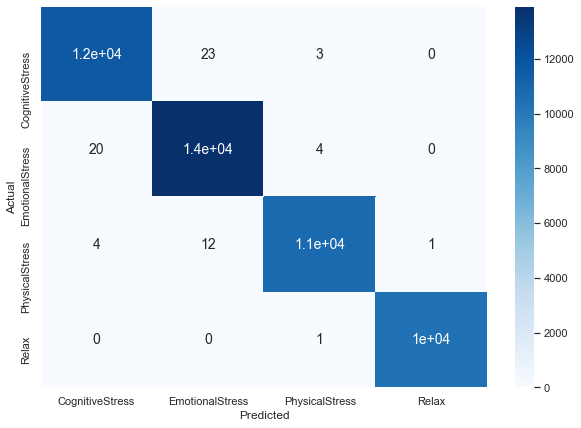

In [44]:
classifiers = [
    RandomForestClassifier()
    #,GradientBoostingClassifier()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    data = confusion_matrix(y_test, train_predictions)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(10, 7))
    sn.set(font_scale=1.0)  # for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 14})  # font size
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
      
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

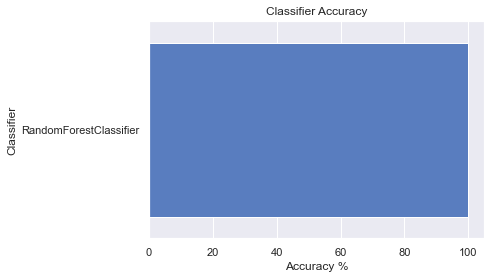

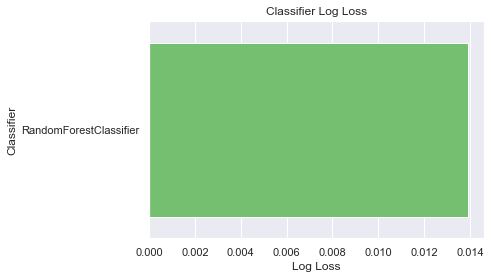

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()